# Data Analysis of Sales Record 

In [47]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

### Gathering The Data

In [2]:
df = pd.read_csv('Records.csv')

In [76]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


### Assessing Data

In [4]:
df.shape

(50000, 14)

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       50000 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  50000 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  int64  
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 4.0+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [13]:
len(df.Region.unique())

7

In [14]:
len(df.Country.unique())

185

### Sales Record Dataset 
- 50000 rows
- 14 columns
- 0 duplicates 
- 0 null values
- 7 Regions
- 185 Countries

In [43]:
df.Region.value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

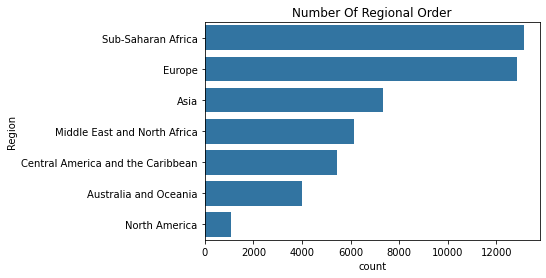

In [79]:
paint = sb.color_palette()[0]
sb.countplot(data=df, y='Region', color=paint)
plt.title('Number Of Regional Order');

In [59]:
doc = df.groupby('Region')['Units Sold'].sum()
doc

Region
Asia                                 36781426
Australia and Oceania                20074859
Central America and the Caribbean    26993612
Europe                               64303354
Middle East and North Africa         30451153
North America                         5605661
Sub-Saharan Africa                   65770884
Name: Units Sold, dtype: int64

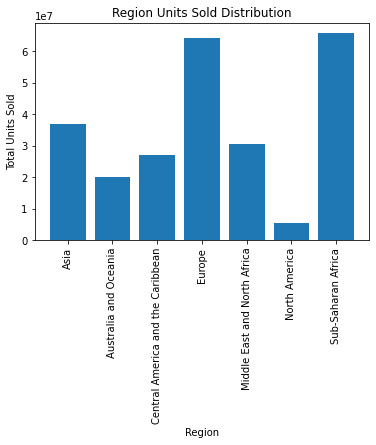

In [78]:
plt.bar(doc.index, doc)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Region Units Sold Distribution')
plt.xticks(rotation = 90);

In [67]:
poc = df.groupby('Region')['Total Profit'].sum()
poc

Region
Asia                                 2.886107e+09
Australia and Oceania                1.575811e+09
Central America and the Caribbean    2.111197e+09
Europe                               4.989883e+09
Middle East and North Africa         2.407280e+09
North America                        4.420242e+08
Sub-Saharan Africa                   5.115635e+09
Name: Total Profit, dtype: float64

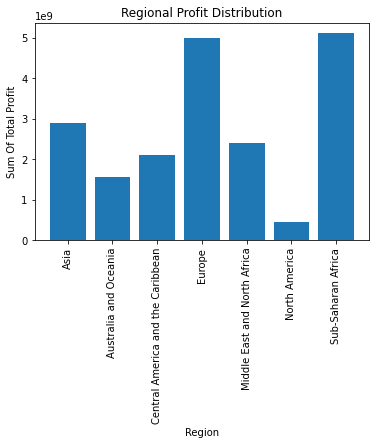

In [77]:
plt.bar(poc.index, poc)
plt.xlabel('Region')
plt.ylabel('Sum Of Total Profit')
plt.title('Regional Profit Distribution')
plt.xticks(rotation = 90);

### Analysis Target Questions 

- The Sub-saharan African country with the most transaction
- The Sub-saharan African country with the most online transactions 
- The Sub-saharan African country with the most offline transactions 
- The Item type mostly ordered offline
- The item type mostly ordered online
- The item type with the most orders
- The Item Type With The Most Unit Sales
- The Item Type With The Most Profit In The Continent
- The Country With The Highest Total Revenue

##### Filtering For Sub-Saharan Africa

In [56]:
africa = df[df.Region == 'Sub-Saharan Africa']
africa

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
6,Sub-Saharan Africa,Djibouti,Household,Online,M,2/3/2011,854331052,3/3/2011,4398,668.27,502.54,2939051.46,2210170.92,728880.54
8,Sub-Saharan Africa,Cameroon,Cosmetics,Offline,M,1/31/2014,241871583,2/4/2014,4031,437.20,263.33,1762353.20,1061483.23,700869.97
9,Sub-Saharan Africa,Nigeria,Cosmetics,Online,C,11/21/2015,409090793,12/7/2015,7911,437.20,263.33,3458689.20,2083203.63,1375485.57
10,Sub-Saharan Africa,Senegal,Fruits,Offline,M,8/29/2016,733153569,10/5/2016,5288,9.33,6.92,49337.04,36592.96,12744.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Sub-Saharan Africa,Benin,Household,Offline,H,11/8/2011,485023057,11/13/2011,7956,668.27,502.54,5316756.12,3998208.24,1318547.88
49989,Sub-Saharan Africa,Ethiopia,Cereal,Online,H,1/18/2014,184171473,1/18/2014,9287,205.70,117.11,1910335.90,1087600.57,822735.33
49990,Sub-Saharan Africa,Seychelles,Personal Care,Online,H,1/3/2014,742188107,2/14/2014,8809,81.73,56.67,719959.57,499206.03,220753.54
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Online,M,8/28/2010,492142713,9/21/2010,4820,109.28,35.84,526729.60,172748.80,353980.80


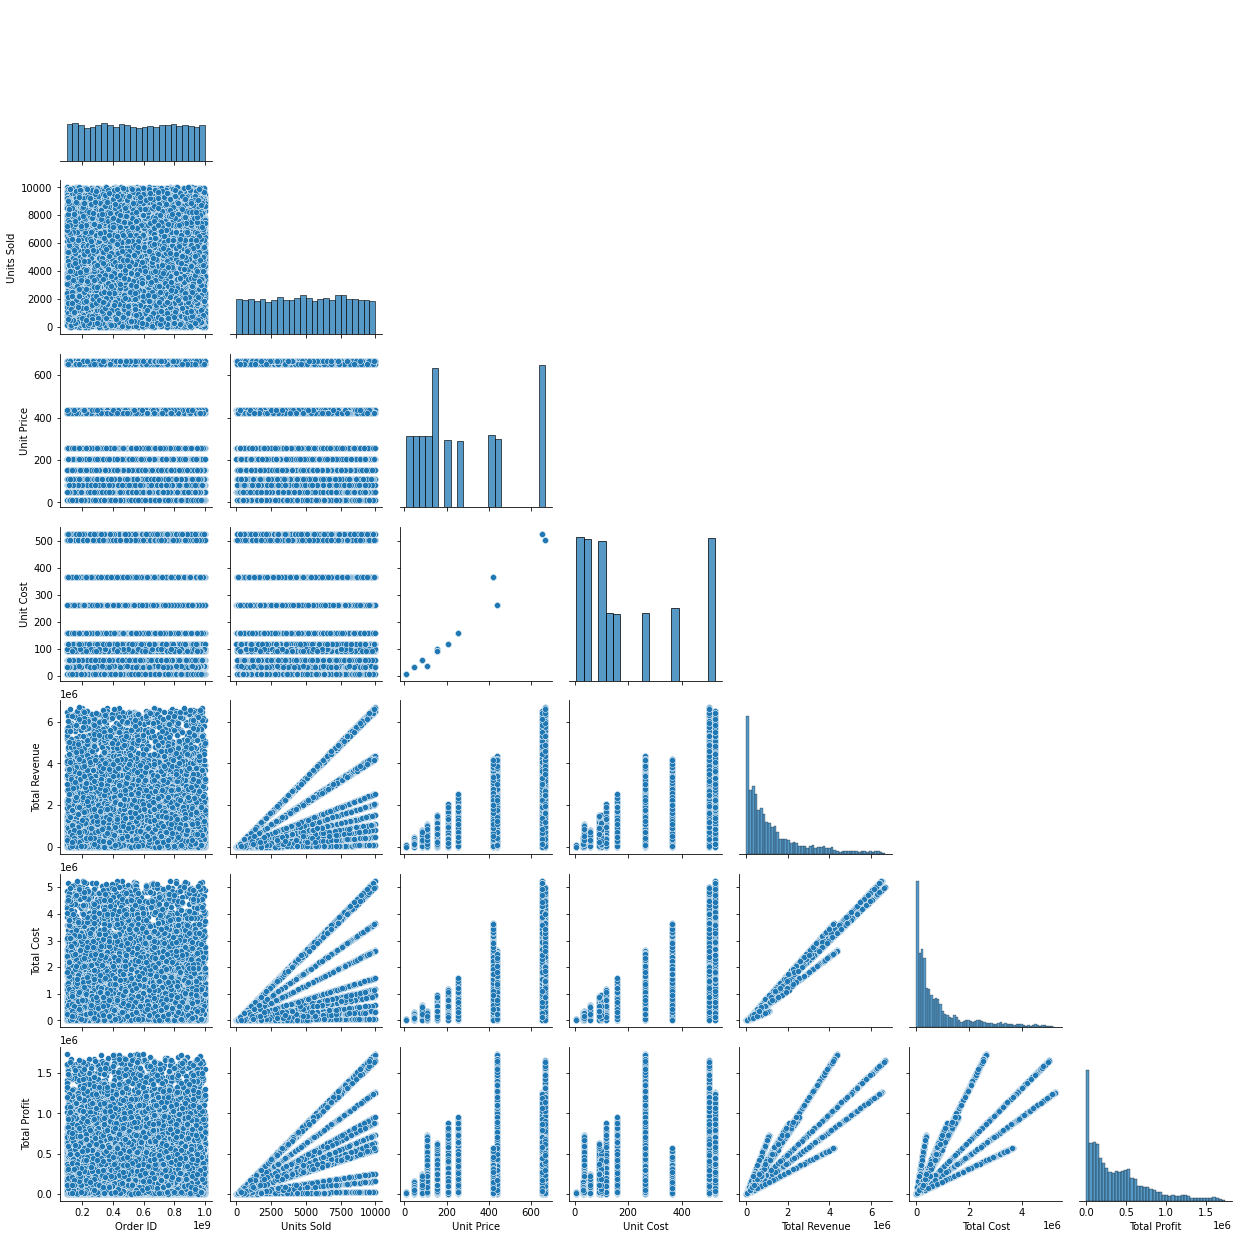

In [6]:
sb.pairplot(africa, corner=True)

#### The Sub-saharan African country with the most transaction

##### Code : 

In [74]:
most_trans = africa.Country.value_counts()[:5]
most_trans

Guinea                              318
Cape Verde                          315
Democratic Republic of the Congo    308
South Sudan                         302
Namibia                             296
Name: Country, dtype: int64

#### The Sub-saharan African country with the most online transactions

##### Code : 

In [73]:
most_online = africa[africa['Sales Channel'] == 'Online']
most_online.Country.value_counts()[:5]

Guinea                              177
Central African Republic            172
Namibia                             164
Democratic Republic of the Congo    157
Cape Verde                          152
Name: Country, dtype: int64

#### The Sub-saharan African country with the most offline transactions

##### Code : 

In [72]:
most_offline = africa[africa['Sales Channel'] == 'Offline']
most_offline.Country.value_counts()[:5]

Cape Verde      163
South Sudan     161
Seychelles      157
South Africa    156
Burundi         154
Name: Country, dtype: int64

#### The Item Type Mostly Ordered Offline

##### Code : 

In [57]:
offline = africa[africa['Sales Channel'] == 'Offline']
offline['Item Type'].value_counts()

Meat               575
Household          574
Fruits             570
Beverages          569
Clothes            566
Vegetables         554
Office Supplies    552
Snacks             552
Personal Care      550
Cosmetics          519
Baby Food          509
Cereal             495
Name: Item Type, dtype: int64

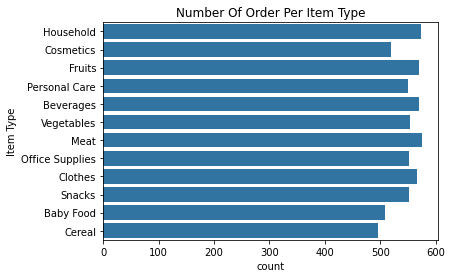

In [80]:
sb.countplot(data=offline, y='Item Type', color=paint)
plt.title('Number Of Order Per Item Type');

#### The Item Type Mostly Ordered Online

##### Code :

In [12]:
online = africa[africa['Sales Channel'] == 'Online']
online['Item Type'].value_counts()

Household          561
Personal Care      558
Meat               554
Cereal             553
Fruits             550
Snacks             546
Beverages          543
Cosmetics          540
Clothes            539
Office Supplies    537
Baby Food          526
Vegetables         524
Name: Item Type, dtype: int64

#### The item type with the most orders

##### Code : 

In [13]:
africa['Item Type'].value_counts()

Household          1135
Meat               1129
Fruits             1120
Beverages          1112
Personal Care      1108
Clothes            1105
Snacks             1098
Office Supplies    1089
Vegetables         1078
Cosmetics          1059
Cereal             1048
Baby Food          1035
Name: Item Type, dtype: int64

#### The Item Type With The Most Unit Sales

##### Code : 

In [23]:
unit_sales = africa.groupby('Item Type')['Units Sold'].sum()
unit_sales.sort_values(ascending = False)

Item Type
Clothes            5679314
Fruits             5649292
Beverages          5606808
Meat               5583837
Household          5581711
Snacks             5540079
Personal Care      5486705
Vegetables         5471542
Office Supplies    5353852
Cereal             5304329
Cosmetics          5263827
Baby Food          5249588
Name: Units Sold, dtype: int64

#### The Item Type With The Most Profit In The Continent 

##### Code : 

In [24]:
most_profit = africa.groupby('Item Type')['Total Profit'].sum()
most_profit.sort_values(ascending = False)

Item Type
Household          9.250570e+08
Cosmetics          9.152216e+08
Office Supplies    6.759238e+08
Baby Food          5.032255e+08
Cereal             4.699105e+08
Clothes            4.170888e+08
Vegetables         3.454184e+08
Meat               3.193955e+08
Snacks             3.054800e+08
Personal Care      1.374968e+08
Beverages          8.780261e+07
Fruits             1.361479e+07
Name: Total Profit, dtype: float64

#### The Country With The Highest Total Revenue 

##### Code : 

In [75]:
high_revenue = africa.groupby('Country')['Total Revenue'].sum()
high_revenue.sort_values(ascending = False)[:5]

Country
Gabon                               4.423345e+08
Democratic Republic of the Congo    4.343350e+08
Guinea                              4.305661e+08
Cape Verde                          4.240295e+08
Rwanda                              4.095358e+08
Name: Total Revenue, dtype: float64

### Conclusion 

- The African country with the most transaction is **Guinea** with **318** transactions. 
- The African country with the most online transactions is **Guinea** with **177** online transactions.
- The African country with the most offline transactions is **Carpe Verde** with **163** offline transactions.
- The Item Type Mostly ordered Offline is **Meat** with total orders of **575**
- The Item Type Mostly ordered Online is **Household** with total orders of **561**
- The item type with the most orders is **Household** with **1135** orders.
- The Item Type With The Most Unit Sales is **Clothes** with a total of **5679314** units. 
- The Item Type With The Most Profit In The Continent is **Household** with **9.250570e+08** Dollars. 
- The Country With The Highest Total Revenue is **Gabon** with a total of **4.423345e+08** Dollars. 